In [1]:
pwd

'/home/wsuser/work'

In [2]:
ls

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0ZUwIRr2cemMsTSq2-U1hLBWW_mmCV76zURcbSVz3h29',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'fertilizerrecommendationsystem-donotdelete-pr-5dvbwkiybmdaje'
object_key = 'fruit-dataset.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [4]:
ls

In [5]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [6]:
ls

test/  train/


In [7]:
pwd

'/home/wsuser/work'

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten 
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

Image Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [10]:
ls

test/  train/


In [11]:
pwd

'/home/wsuser/work'

In [12]:
x_train=train_datagen.flow_from_directory(r'/home/wsuser/work/train',target_size=(128,128),class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [13]:
x_test=test_datagen.flow_from_directory(r"/home/wsuser/work/test",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [14]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

Add Layers

In [16]:
model=Sequential()

In [17]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [18]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [19]:
32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [20]:
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

225

In [21]:
1238/24

51.583333333333336

fit the model

In [ ]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/tmp/wsuser/ipykernel_164/1582812018.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)


Epoch 1/10
225/225 [==============================] - 134s 595ms/step - loss: 1.2112 - accuracy: 0.7764 - val_loss: 0.3413 - val_accuracy: 0.8778
Epoch 2/10
191/225 [========================>.....] - ETA: 18s - loss: 0.2956 - accuracy: 0.8986

save the model

In [54]:
model.save('fruitdata.h5')

Testing the model

In [55]:
model=load_model('fruitdata.h5')

In [56]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [57]:
img=image.load_img(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/01efa999-757d-487e-8250-27c7854c0ca8___RS_HL 7515.JPG")

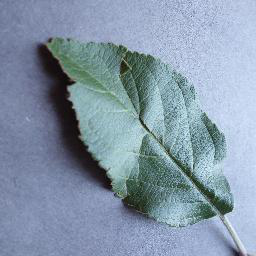

In [58]:
img

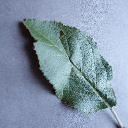

In [67]:
img=image.load_img(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/01efa999-757d-487e-8250-27c7854c0ca8___RS_HL 7515.JPG",target_size=(128,128))
img

In [60]:
x=image.img_to_array(img)
x

array([[[111., 122., 152.],
        [110., 121., 151.],
        [118., 129., 159.],
        ...,
        [184., 198., 225.],
        [187., 201., 228.],
        [180., 194., 221.]],

       [[124., 135., 165.],
        [117., 128., 158.],
        [121., 132., 162.],
        ...,
        [178., 192., 219.],
        [191., 205., 232.],
        [179., 193., 220.]],

       [[123., 134., 164.],
        [117., 128., 158.],
        [114., 125., 155.],
        ...,
        [180., 194., 221.],
        [189., 203., 230.],
        [179., 193., 220.]],

       ...,

       [[114., 128., 157.],
        [118., 132., 161.],
        [125., 139., 168.],
        ...,
        [177., 191., 217.],
        [187., 199., 223.],
        [180., 192., 216.]],

       [[120., 134., 163.],
        [125., 139., 168.],
        [122., 136., 165.],
        ...,
        [189., 197., 216.],
        [188., 197., 214.],
        [186., 195., 210.]],

       [[127., 141., 170.],
        [118., 132., 161.],
        [118., 1

In [61]:
x=np.expand_dims(x,axis=0)
x

array([[[[111., 122., 152.],
         [110., 121., 151.],
         [118., 129., 159.],
         ...,
         [184., 198., 225.],
         [187., 201., 228.],
         [180., 194., 221.]],

        [[124., 135., 165.],
         [117., 128., 158.],
         [121., 132., 162.],
         ...,
         [178., 192., 219.],
         [191., 205., 232.],
         [179., 193., 220.]],

        [[123., 134., 164.],
         [117., 128., 158.],
         [114., 125., 155.],
         ...,
         [180., 194., 221.],
         [189., 203., 230.],
         [179., 193., 220.]],

        ...,

        [[114., 128., 157.],
         [118., 132., 161.],
         [125., 139., 168.],
         ...,
         [177., 191., 217.],
         [187., 199., 223.],
         [180., 192., 216.]],

        [[120., 134., 163.],
         [125., 139., 168.],
         [122., 136., 165.],
         ...,
         [189., 197., 216.],
         [188., 197., 214.],
         [186., 195., 210.]],

        [[127., 141., 170.],
       

In [62]:
x

array([[[[111., 122., 152.],
         [110., 121., 151.],
         [118., 129., 159.],
         ...,
         [184., 198., 225.],
         [187., 201., 228.],
         [180., 194., 221.]],

        [[124., 135., 165.],
         [117., 128., 158.],
         [121., 132., 162.],
         ...,
         [178., 192., 219.],
         [191., 205., 232.],
         [179., 193., 220.]],

        [[123., 134., 164.],
         [117., 128., 158.],
         [114., 125., 155.],
         ...,
         [180., 194., 221.],
         [189., 203., 230.],
         [179., 193., 220.]],

        ...,

        [[114., 128., 157.],
         [118., 132., 161.],
         [125., 139., 168.],
         ...,
         [177., 191., 217.],
         [187., 199., 223.],
         [180., 192., 216.]],

        [[120., 134., 163.],
         [125., 139., 168.],
         [122., 136., 165.],
         ...,
         [189., 197., 216.],
         [188., 197., 214.],
         [186., 195., 210.]],

        [[127., 141., 170.],
       

In [63]:
y=np.argmax(model.predict(x),axis=1)

In [64]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

'Apple___Black_rot'

In [70]:
img=image.load_img(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/01efa999-757d-487e-8250-27c7854c0ca8___RS_HL 7515.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

'Apple___Black_rot'

In [77]:
!tar -zcvf Train_fruitmodel_new.tgz fruitdata.h5

fruitdata.h5


In [78]:
ls -1

'Dataset Plant Disease'/
Fertilizer
Fertilizernrecommendation
fruitdata.h5
test/
test_set/
train/
Train-fruitmodel_new.tgz
Train_fruitmodel_new.tgz
Train-model_new.tgz
train_set/


In [79]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 13.2 MB/s eta 0:00:01


In [105]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
                    "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey":"hAbDywMH0YlWk6Az1AmAJSbuPl2RxljpDSNBuspC6kYp" 
                  }

client = APIClient(wml_credentials)

In [106]:
client = APIClient(wml_credentials)

In [107]:
def guid_from_space_name(client, space_name): 
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [109]:
space_uid = guid_from_space_name(client,'CNN Deployement') 
print("Space UID = " + space_uid)

StopIteration: 

In [99]:
client.set.default_space(space_uid)

NameError: name 'space_uid' is not defined

In [100]:
client.software_specifications.list()

You must set the space/project id. Use `client.set.default_space(<SPACE_UID>)`/`client.set.default_project(<PROJECT_UID>)` to proceed.


WMLClientError: You must set the space/project id. Use `client.set.default_space(<SPACE_UID>)`/`client.set.default_project(<PROJECT_UID>)` to proceed.

In [101]:
software_space_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

NameError: name 'software_spec_uid' is not defined

In [ ]:
 ls

In [ ]:
model_details = client.repository.store_model(model= 'Train-model_new.tgz',
    meta_props={
        client.repository.ModelMetaNames.NAME:"CNN",
        client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid}
    )

In [ ]:
model_id = client.repository.get_model_id(model_details)

In [ ]:
model_id

In [ ]:
ls